# Level 2
## Task 1- Table Booking and Online Delivery

### Import libraries and read the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Dataset.csv")

In [4]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Determine the percentage of restaurants that offer table booking and online delivery

In [5]:
percentage_table_booking=(df['Has Table booking'].value_counts(normalize =True))
percentage_online_delivery =(df['Has Online delivery'].value_counts(normalize=True))

print("Restaurant offering table booking in %: ",percentage_table_booking)
print("\nRestaurant offering online delivery in %: ",percentage_online_delivery)

Restaurant offering table booking in %:  Has Table booking
No     0.878756
Yes    0.121244
Name: proportion, dtype: float64

Restaurant offering online delivery in %:  Has Online delivery
No     0.743378
Yes    0.256622
Name: proportion, dtype: float64


### Compare the average rating of restaurants with table booking and those without:

In [6]:
table_booking_average_ratings=df.groupby('Has Table booking')['Aggregate rating'].mean()
table_booking_average_ratings

Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64

### Analyze the availability of online delivery among restaurants with different price ranges.

In [8]:
price_range_groups=df.groupby('Price range')
online_delivery_percent_by_price_range=(price_range_groups['Has Online delivery'].value_counts(normalize=True) * 100)
print("Percentage of restaurants offering online delivery by price range: ")
print(online_delivery_percent_by_price_range)

Percentage of restaurants offering online delivery by price range: 
Price range  Has Online delivery
1            No                     84.225923
             Yes                    15.774077
2            No                     58.689367
             Yes                    41.310633
3            No                     70.809659
             Yes                    29.190341
4            No                     90.955631
             Yes                     9.044369
Name: proportion, dtype: float64


## Task 2- Price Range Analysi
### Determine the most common price range among all the restaurants.

In [10]:
price_range_counts=df['Price range'].value_counts()
most_common_price_range = price_range_counts.idxmax()

print("The most common price range among all the restaurants is:", most_common_price_range)

The most common price range among all the restaurants is: 1


### Calculate the average rating for each price range

In [11]:
average_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()

print("Average rating for each price range:")
print(average_rating_by_price_range)

Average rating for each price range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


### Identify the color that represents the highest average rating among different price ranges.

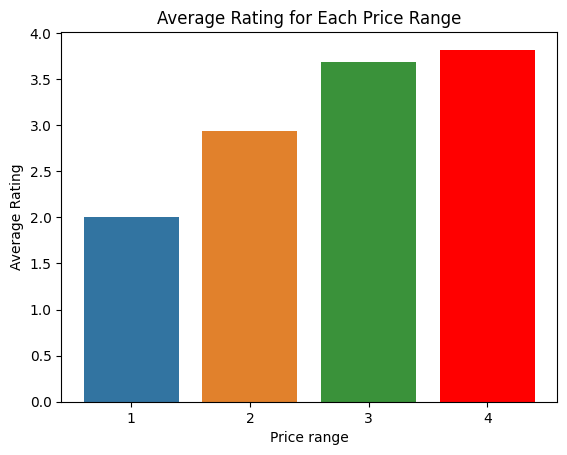

In [12]:
average_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()

highest_rating_price_range = average_rating_by_price_range.idxmax()

sns.barplot(x=average_rating_by_price_range.index, y=average_rating_by_price_range.values)
plt.xlabel('Price range')
plt.ylabel('Average Rating')
plt.title('Average Rating for Each Price Range')

highest_rating_index = average_rating_by_price_range.index.get_loc(highest_rating_price_range)
plt.bar(highest_rating_index, average_rating_by_price_range[highest_rating_price_range], color='red')

plt.show()

## Task 3- Features Engineering
### Extract additional features from the existing columns, such as the length of the restaurant name or address.

In [13]:
df['Name Length'] = df['Restaurant Name'].apply(lambda name: len(name))

df['Address Length'] = df['Address'].apply(lambda address: len(address))

print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City   
0        6317637        Le Petit Souffle           162       Makati City  \
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address   
0  Third Floor, Century City Mall, Kalayaan Avenu...  \
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality   
0   Century City Mall, Poblacion, Makati City  \
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

### Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [14]:
df = pd.get_dummies(df, columns=['Has Table booking', 'Has Online delivery'])

print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City   
0        6317637        Le Petit Souffle           162       Makati City  \
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address   
0  Third Floor, Century City Mall, Kalayaan Avenu...  \
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality   
0   Century City Mall, Poblacion, Makati City  \
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

##